## 회귀
- 소득이 증가하면 소비도 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함
- 변수 X,Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘

## 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균화한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RSE : MSE의 양의 제곱근
- R square : 분산 기반으로 예측 성능을 평가, 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
    - 1에 가까울 수록 예측 정확도가 높음. (예측값 Variance / 실제값 Variance)로 구함
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('../m2_분석라이브러리활용/pandas/dataset/auto-mpg.xlsx')
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [3]:
ndf.horsepower[ndf.horsepower == '?'] = np.nan # NAN 으로 값 변경
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)
ndf.horsepower = ndf.horsepower.astype('float') # float로 type 변경

In [4]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [5]:
ndf.to_pickle('./dataset/auto-mpg.pkl')

In [6]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state = 11)

<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

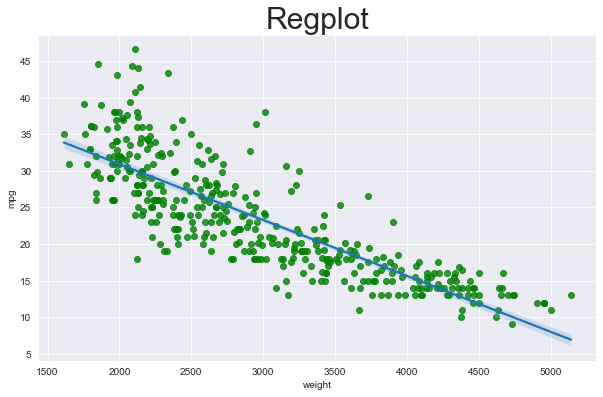

In [7]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(ax=axes,x='weight',y='mpg',data=ndf,scatter_kws={'color':'green'})

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [9]:
# 기울기와 절편
print('기울기: ',lr.coef_)
print('절편: ',lr.intercept_)

기울기:  [-0.00762163]
절편:  45.971217704757684


In [10]:
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error

mae = round(mean_absolute_error(y_test, y_preds),2)
mse = round(mean_squared_error(y_test, y_preds),2)
rmse = round(np.sqrt(mse),2)
R2 = round(r2_score(y_test, y_preds),2)
print(f'mae: {mae}, mse: {mse}, rmse: {rmse}, R2: {R2}')

mae: 3.43, mse: 22.17, rmse: 4.71, R2: 0.64


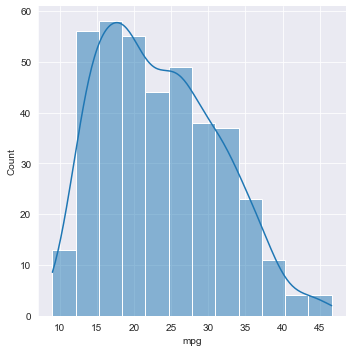

In [11]:
sns.displot(y,kde=True)

<AxesSubplot:ylabel='Density'>

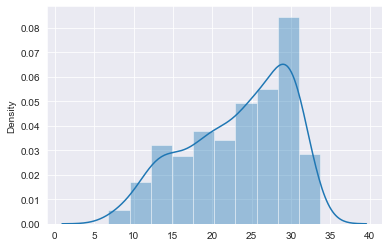

In [12]:
y_hat = lr.predict(X)
sns.distplot(y_hat,kde=True)

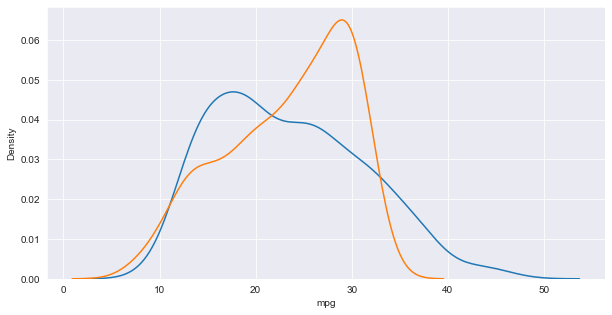

In [13]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')
plt.show()
plt.close()

## 다항 회귀분석
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
- 다항회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형과는 무관

In [14]:
X_train.shape

(274, 1)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print(X_train.shape)
print(X_train_poly.shape) # 절편까지 3개 항..

(274, 1)
(274, 3)


In [17]:
X_train_poly[:3]

array([[1.0000000e+00, 2.1200000e+03, 4.4944000e+06],
       [1.0000000e+00, 4.4990000e+03, 2.0241001e+07],
       [1.0000000e+00, 1.8450000e+03, 3.4040250e+06]])

In [18]:
# 차수 확인
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)

In [20]:
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error

mae = round(mean_absolute_error(y_test, y_preds),2)
mse = round(mean_squared_error(y_test, y_preds),2)
rmse = round(np.sqrt(mse),2)
R2 = round(r2_score(y_test, y_preds),2)
print(f'mae: {mae}, mse: {mse}, rmse: {rmse}, R2: {R2}')

mae: 3.39, mse: 22.43, rmse: 4.74, R2: 0.64


In [21]:
print(lr.coef_)
print(lr.intercept_)

[ 0.00000000e+00 -2.06207232e-02  2.03618732e-06]
65.12274142723446


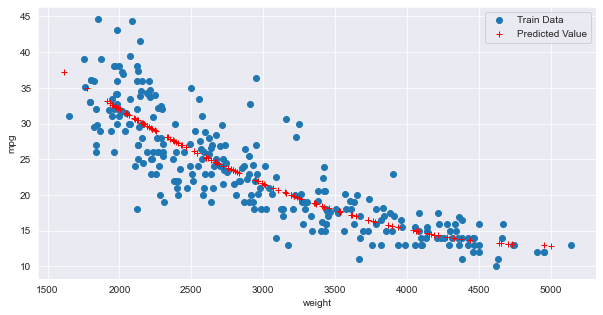

In [22]:
y_hat_test = lr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

In [23]:
# [과제] X 데이터를 X_poly 데이터셋으로 변환하여 2차함수로 만들어진 데이터셋을 예측하고 시각화 하세요.
# 0~1사이 균일분포에서 랜덤추출
import numpy as np
np.random.seed(42)
m=100
X = 6*np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [24]:
X_test_poly[:5]

array([[1.000000e+00, 2.190000e+03, 4.796100e+06],
       [1.000000e+00, 2.665000e+03, 7.102225e+06],
       [1.000000e+00, 2.370000e+03, 5.616900e+06],
       [1.000000e+00, 2.755000e+03, 7.590025e+06],
       [1.000000e+00, 4.060000e+03, 1.648360e+07]])

In [25]:
X_test[:5]

,weight
240,2190
390,2665
391,2370
236,2755
222,4060


In [26]:
y_preds[:5]

array([29.7291156 , 24.62997456, 27.68868798, 23.76736165, 14.96630252])

In [27]:
y_test[:5]

240    30.5
390    32.0
391    36.0
236    25.5
222    17.0
Name: mpg, dtype: float64

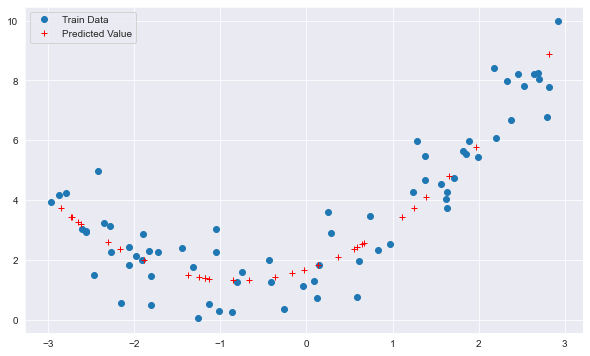

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)
# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)
# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()

# 다중 회귀분석
- 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성

In [29]:
df = pd.read_pickle('./dataset/auto-mpg.pkl')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('mpg',axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 10)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
round(r_square,4)

0.6939

In [31]:
# Q. mse, rmsem r_square,(r2_score). 기울기, 절편
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error

mse = round(mean_squared_error(y_test, y_preds),2)
rmse = round(np.sqrt(mse),2)
R2 = round(r2_score(y_test, y_preds),2)
print(f'mse: {mse}, rmse: {rmse}, R2_score: {R2}, \n기울기: {[round(i,2) for i in lr.coef_]} \n절편: {round(lr.intercept_,2)}')

mse: 17.33, rmse: 4.16, R2_score: 0.69, 
기울기: [-0.61, -0.04, -0.01] 
절편: 46.41


In [32]:
y_preds.shape

(118,)

In [33]:
X_test

,cylinders,horsepower,weight
243,3,110.0,2720
371,4,84.0,2525
300,8,90.0,3420
345,4,60.0,1760
265,8,140.0,4080
...,...,...,...
384,4,67.0,1965
20,4,87.0,2672
189,8,120.0,3962
60,4,90.0,2408


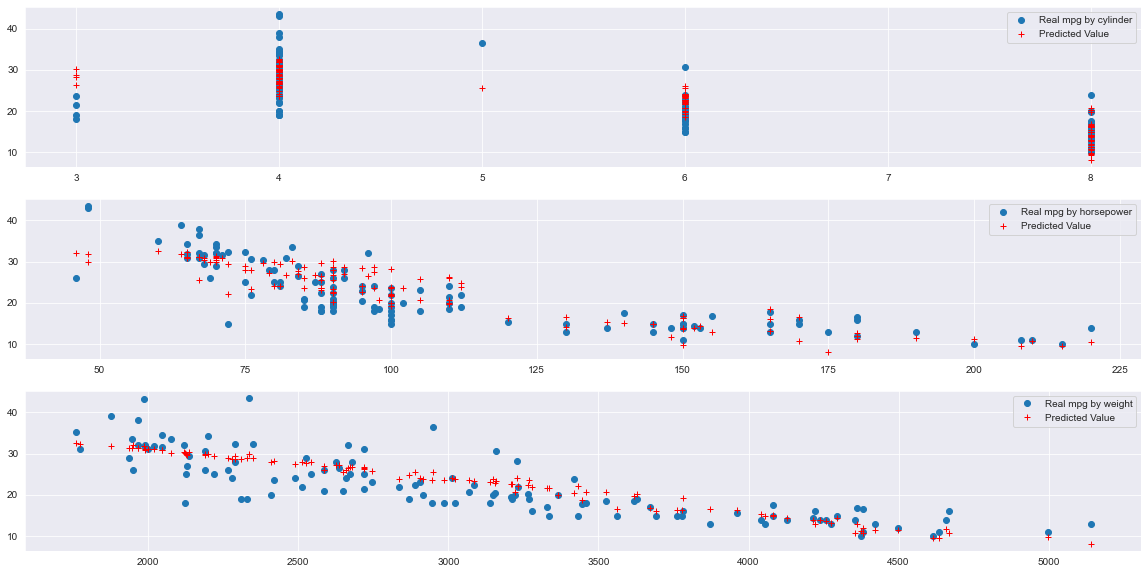

In [34]:
# [과제] y_test, y_hat을 하나의 그래프로 비교하여 시각화

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.plot(X_test.iloc[:,0],y_test,'o',label='Real mpg by cylinder')
ax1.plot(X_test.iloc[:,0],y_preds,'r+', label='Predicted Value')
ax1.legend(loc='best')

ax2.plot(X_test.iloc[:,1],y_test,'o',label='Real mpg by horsepower')
ax2.plot(X_test.iloc[:,1],y_preds,'r+', label='Predicted Value')
ax2.legend(loc='best')

ax3.plot(X_test.iloc[:,2],y_test,'o',label='Real mpg by weight')
ax3.plot(X_test.iloc[:,2],y_preds,'r+', label='Predicted Value')
ax3.legend(loc='best')

plt.show()
plt.close()

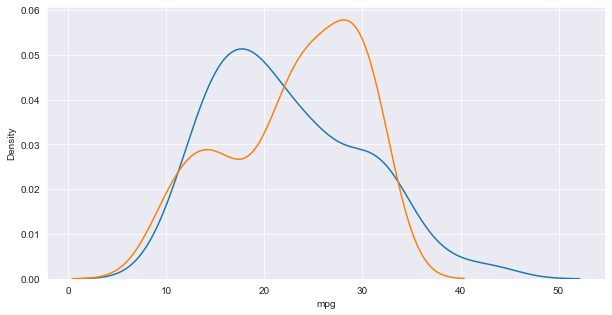

In [43]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test,hist=False,label='y')
ax2 = sns.distplot(y_preds,hist=False,label='y_hat')
plt.show()
plt.close()

[과제] 아래 Boston 데이터 셋으로 보스턴 주택가격 예측 모델을 만들고 평가하세요.

In [3]:
from sklearn.datasets import load_boston
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

https://m.blog.naver.com/taewwon/221588342602